<hr>
<h2 style="color:#ae5a41;">WHPy - Data-Vizualisation</h2>
<hr>
<h4 style="color:#ae5a41;">0 - Initial set</h4>
<hr>

<h4 style="color:#ae5a41;">Initial check</h4>
<hr>
<h5 style="color:#ae5a41;">Observation</h5>
La table initiale de notre jeu de données a 12 colonnes et 1949 lignes concernant un pays une année.<br>
Ce sont des données numériques à l’exception de la région du monde à laquelle appartient le pays.<br>
Nous avons 166 pays au total, pour 10 régions et 16 années représentées, avec des valeurs manquantes assez rares. Les variables avec le plus de valeurs manquantes sont “Perceptions of corruption”, “Generosity” et “Healthy life expectancy at birth”.<br>

On constate 4 échelles de valeurs :
* dans les 2000 pour les années
* entre 50 et 100 pour l’espérance de vie “Life Expectancy”
* 5 à 12 pour Life Ladder et LogGDP
* en pourcentage pour les autres questions du sondage

Toutes les données ont une répartition relativement équilibrée (pas de valeurs aberrantes).<br>
A surveiller la notion de générosité (Generosity : min -0.33 à q3 0.09 puis max loin à 0.69) et la perception de la corruption (Corruption : min loin 0.03 puis q1 0.7 à max 0.98); Celles-ci auraient pu justifier une normalisation, bien que cela n’ait pas été nécessaire.<br>

In [1]:
# import librairie, des csv et déclaration des fonctions utiles a la partie

# librarie
import pandas as pd

# csv
whr = pd.read_csv('whr.csv', sep=';',index_col = 0)

# fonction
def _info(df):
    """
    """
    print("\nNumber of duplicated data:",df.duplicated().sum()) # Number of duplicated data
    df_info = pd.DataFrame({"Column" : df.columns, "Dtype":df.dtypes.values, "Number of values":df.count().values,
                        "NA values":df.isna().sum().values, "Unique values":df.nunique().values})
    return df_info

print("1st visualisation of the dataframe\n")
whr.head()

1st visualisation of the dataframe



Country  Year  Life Ladder  LogGDP  SocialSupport  LifeExpectancy  \
0  Afghanistan  2008        3.724   7.370          0.451           50.80   
1  Afghanistan  2009        4.402   7.540          0.552           51.20   
2  Afghanistan  2010        4.758   7.647          0.539           51.60   
3  Afghanistan  2011        3.832   7.620          0.521           51.92   
4  Afghanistan  2012        3.783   7.705          0.521           52.24   

   Freedom  Generosity  Corruption  PosAffect  NegAffect      Region  
0    0.718       0.168       0.882      0.518      0.258  South Asia  
1    0.679       0.190       0.850      0.584      0.237  South Asia  
2    0.600       0.121       0.707      0.618      0.275  South Asia  
3    0.496       0.162       0.731      0.611      0.267  South Asia  
4    0.531       0.236       0.776      0.710      0.268  South Asia

In [2]:
_info(whr)


Number of duplicated data: 0


Column    Dtype  Number of values  NA values  Unique values
0          Country   object              1949          0            166
1             Year    int64              1949          0             16
2      Life Ladder  float64              1949          0           1553
3           LogGDP  float64              1913         36           1500
4    SocialSupport  float64              1936         13            455
5   LifeExpectancy  float64              1894         55            828
6          Freedom  float64              1917         32            535
7       Generosity  float64              1860         89            609
8       Corruption  float64              1839        110            572
9        PosAffect  float64              1927         22            431
10       NegAffect  float64              1933         16            374
11          Region   object              1949          0             10

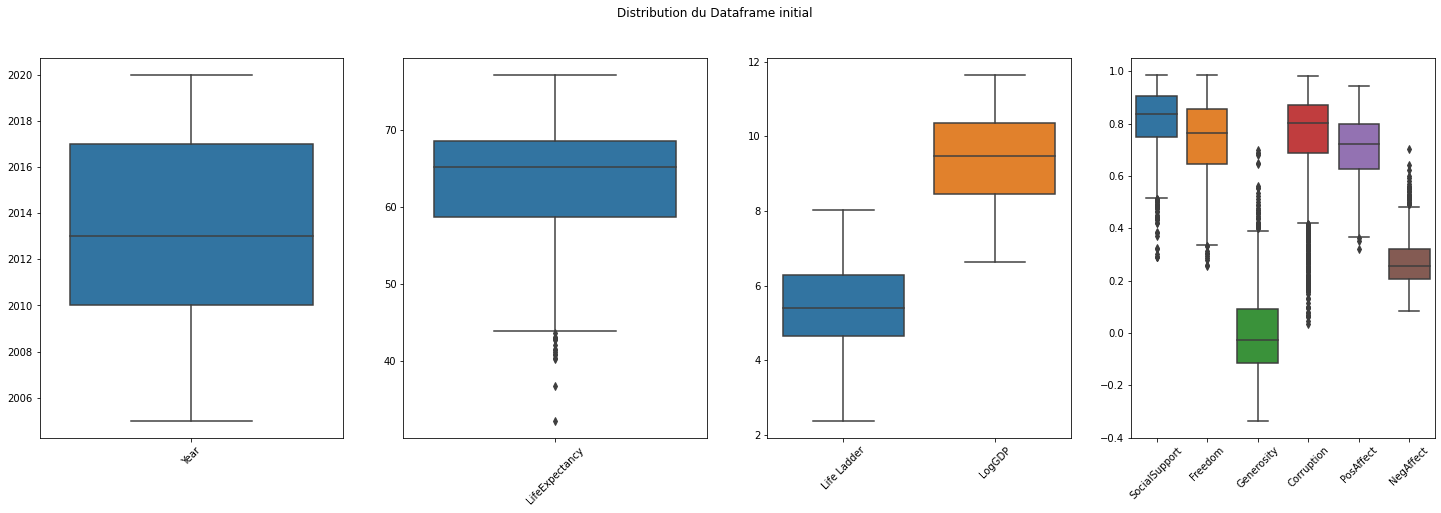

In [123]:
# valeur aberente
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

fig, axes = plt.subplots(1, 4, figsize=(25, 7), sharey=False)
fig.suptitle('Distribution du Dataframe initial')
sns.boxplot(ax=axes[0],data=whr[["Year"]])
sns.boxplot(ax=axes[1],data=whr[["LifeExpectancy"]])
sns.boxplot(ax=axes[2],data=whr[["Life Ladder","LogGDP"]])
sns.boxplot(ax=axes[3],data=whr[["SocialSupport","Freedom","Generosity","Corruption","PosAffect","NegAffect"]])
for i in range(0,4,1):axes[i].set_xticklabels(axes[i].get_xticklabels(),rotation=45)

<h4 style="color:#ae5a41;">Missing Data</h4>
<hr>
<h5 style="color:#ae5a41;">Observation</h5>

Au global, les données manquantes sont rares mais certaines années le nombre de pays représentés était beaucoup plus faible, l’année 2005 notamment ne concerne qu’une poignée de pays.<br>
Il convient donc d’analyser l’impact des années et des pays représentés pour prévenir un éventuel biais. <br>
On peut envisager de ne considérer que les années avec au moins 100 pays (2007 à 2019); à savoir que l’ONU reconnaît 195 pays.<br>

Les régions qui ont le plus de données manquantes sont “East asia” et “middle East countries” <br>

In [4]:
df_missing_data = whr
df_missing_data["Missing data by country and year"] = df_missing_data.isna().sum(axis=1)

# missing data by country
# -----------------------------------
import numpy as np

df_missing_data_per_country = df_missing_data.groupby('Country')[['Missing data by country and year']].sum().sort_values(
    by='Missing data by country and year',ascending=False)
df_missing_data_per_country = df_missing_data_per_country.rename(columns={"Missing data by country and year":"Missing data by country"})

df_whr_with_missing_data = df_missing_data[(df_missing_data["Missing data by country and year"] > 0)].groupby('Country')[['Year']].count().sort_values(
    by='Year',ascending=False).rename(columns={"Year":"Nb year with missing data"})

df_missing_data_per_country = df_missing_data_per_country.merge(df_whr_with_missing_data, on='Country', how='outer')
df_missing_data_per_country = df_missing_data_per_country.merge(df_missing_data[["Country","Region"]].drop_duplicates(), on='Country', how='inner')

print ("nb country with missing data:",np.count_nonzero(df_missing_data_per_country[["Missing data by country"]]))
print ("nb country without missing data:",len(df_missing_data_per_country) - np.count_nonzero(df_missing_data_per_country[["Missing data by country"]]))
print ()

# missing data by year
# -----------------------------------
import numpy as np

df_missing_data_per_year = df_missing_data.groupby('Year')[['Missing data by country and year']].sum().sort_values(by='Year')
df_missing_data_per_year = df_missing_data_per_year.rename(columns={"Missing data by country and year":"Missing data by year"})


df_whr_with_missing_data_year = df_missing_data[(df_missing_data["Missing data by country and year"] > 0)].groupby('Year')[['Country']].count().sort_values(
    by='Country',ascending=False).rename(columns={"Country":"Nb country with missing data"})

df_missing_data_per_year = df_missing_data_per_year.merge(df_whr_with_missing_data_year, on='Year', how='outer')

df_missing_data_per_year.reset_index(level=0, inplace=True)
df_missing_data_per_year

# country count per Year
from bokeh.models import Range1d
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource,LabelSet, Label, CategoricalColorMapper
from bokeh.models.tools import HoverTool
from bokeh.transform import factor_cmap
from bokeh.palettes import Category10_10
from bokeh.models import Range1d

df_whr_year_count = pd.DataFrame(data={'Year': pd.value_counts(whr["Year"]).index, 
                                        'nb_values': pd.value_counts(whr["Year"]).values,
                                       'nb_values_perc': pd.value_counts(whr["Year"]).values/pd.value_counts(whr["Year"]).values.sum()*100,
                                       'Nb':df_missing_data_per_year['Nb country with missing data']
                                      }).sort_values(by='Year')
df_whr_year_count['perc_missing'] = df_whr_year_count['Nb'] / df_whr_year_count['nb_values']*100
source = ColumnDataSource(df_whr_year_count)

p1 = figure(plot_width=800, plot_height=400,title="Total country by year")
p1.vbar(x='Year', top='nb_values', width=0.8, source=source, legend_label = "Nb country")           
p1.vbar(x = 'Year', top = 'Nb', width = 0.6, source = source, color = "tomato", legend_label = "Nb country with missing data") 

p1.add_tools(HoverTool(tooltips=[("year", "@Year"),("(Nb country, % All values)", "(@nb_values, @nb_values_perc)"),
                                ("(Nb country with missing data, perc_missing)", "(@Nb, @perc_missing)")]))
p1.line([2005, 2020],[102, 102], line_width=2, color="black", legend_label="89% values, 81% years") # line to have 90% of the values

p1.legend.location = "top_left"       # On positionne la légende en haut à gauche
p1.y_range = Range1d(0, 170)

# country count per Year
df_whr_year_count = pd.DataFrame(data={'Year': pd.value_counts(whr["Year"]).index,
                                       'nb_values': pd.value_counts(whr["Year"]).values*8,
                                       'Missing':df_missing_data_per_year['Missing data by year']
                                      }).sort_values(by='Year', ascending=False)
df_whr_year_count['perc_missing'] = df_whr_year_count['Missing'] / df_whr_year_count['nb_values']*100

source = ColumnDataSource(df_whr_year_count)
p2 = figure(plot_width=800, plot_height=400,title="Total data by year")
p2.vbar(x='Year', top='nb_values', width=0.8, source=source, legend_label = "Nb data expected")           
p2.vbar(x = 'Year', top = 'Missing', width = 0.6, source = source, color = "red", legend_label = "Nb missing data") 

p2.add_tools(HoverTool(tooltips=[("year", "@Year"),("Nb values", "@nb_values"),("Missing data", "@Missing"),("perc_missing", "@perc_missing")]))

p2.legend.location = "top_left"       # On positionne la légende en haut à gauche

#show(p2)

from bokeh.layouts import gridplot

# Définition de la grille
g = gridplot([[p1], [p2]])

# Affichage de la grille
output_notebook()
show(g)

nb country with missing data: 74
nb country without missing data: 92



Loading BokehJS ...

In [33]:
# Plot 

from bokeh.io import output_notebook, show
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource,LabelSet, Label, CategoricalColorMapper
from bokeh.models.tools import HoverTool
from bokeh.transform import factor_cmap
from bokeh.palettes import Category20_10
from bokeh.models import Range1d

output_notebook()

source = ColumnDataSource(data={'Missing data by country':df_missing_data_per_country['Missing data by country'].values,
                                'Nb year with missing data':df_missing_data_per_country['Nb year with missing data'].values,
                                'Country':df_missing_data_per_country['Country'].values,
                                'Region_color': df_missing_data_per_country['Region'].values}) 

color_mapper = CategoricalColorMapper(factors=df_missing_data_per_country['Region'].sort_values().unique(), palette=Category20_10)

p = figure(plot_width = 1000, plot_height = 600)
p.circle(x = 'Missing data by country', y= 'Nb year with missing data', size = 15, color = {'field': 'Region_color', 'transform': color_mapper},
             source = source,  legend_field='Region_color', fill_alpha = 0.5)

p.add_tools(HoverTool(tooltips=[("Missing data by country", "$x"),("Nb year with missing data", "$y")]))
p.xaxis.axis_label = 'Missing data by country'
p.yaxis.axis_label = 'Nb year with missing data'
p.add_layout(LabelSet(x='Missing data by country', y='Nb year with missing data', text='Country',text_font_size='9pt',
                  x_offset=0, y_offset=5, source=source, render_mode='canvas'))
p.legend.location = "top_left" 
p.x_range = Range1d(0, 25)

show(p)

Loading BokehJS ...

<h4 style="color:#ae5a41;">MATRICE CORRELATION</h4>
<h5 style="color:#ae5a41;">Observation</h5>

Les Variables les plus corrélées au score de bonheur “Life Ladder” sont, <br>
de façon positive : <br>
LogGDP : 0.79, LifeExpectancy : 0.74, SocialSupport : 0.71, Freedom : 0.53 et PosAffect : 0.53; <br>
et de façon négative : <br>
Corruption : -0.43 et NegAffect : -0.3. <br>
La générosité est peu corrélée.<br>
Des variables ont aussi des corrélations fortes entre elles au delà du score de bonheur : <br>
LogGDP et SocialSupport : 0.69, LifeExpectancy et SocialSupport : 0.62, Freedom et PosAffect : 0.61,  voir très forte entre elles, LifeExpectancy et LogGDP : 0.85<br>
Les informations que nous apportent ces données sont donc peut-être dédoublées, au sens où elles décrivent les mêmes phénomènes locaux, partiellement ou intégralement, il faudra en tenir compte dans le choix de nos modèles.<br>


/tmp/ipykernel_5019/4053684333.py:9: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(whr.drop(columns=["Missing data by country and year"]).corr(), dtype=np.bool))


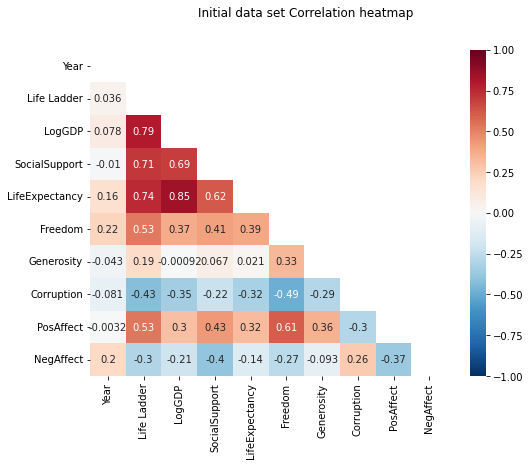

In [12]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(8, 6))
fig.suptitle('Initial data set Correlation heatmap')

mask = np.triu(np.ones_like(whr.drop(columns=["Missing data by country and year"]).corr(), dtype=np.bool))
sns.heatmap(whr.drop(columns=["Missing data by country and year"]).corr(), annot=True,vmin=-1, vmax=1, cmap='RdBu_r', center=0, mask=mask);

<hr>
<h4 style="color:#ae5a41;">DropNA set</h4>
<hr>
Suite à ces observations, nous avons fait le choix d’éliminer simplement les données manquantes.<br>
Le jeu de données “whr_NoNA” à 1708 lignes et 155 pays, le nombre d'années reste inchangé.<br>
Nous conservons 88% des lignes (-241) et 93.4% des pays (-11) du jeu de données initial.<br>
La dispersion des données reste très proche avec et sans les valeurs manquantes<br>
Les scores de corrélations restent aussi très similaires<br>

In [13]:
# librarie
import pandas as pd

whr_NoNA = pd.read_csv('whr_NoNA.csv', sep=';',index_col = 0)
whr = pd.read_csv('whr.csv', sep=';',index_col = 0)

# fonction
def _info(df):
    """
    """
    print("\nNumber of duplicated data:",df.duplicated().sum()) # Number of duplicated data
    df_info = pd.DataFrame({"Column" : df.columns, "Dtype":df.dtypes.values, "Number of values":df.count().values,
                        "NA values":df.isna().sum().values, "Unique values":df.nunique().values})
    return df_info

print("1st visualisation of the dataframe\n")
whr_NoNA.head()

1st visualisation of the dataframe



Country  Year  Life Ladder  LogGDP  SocialSupport  LifeExpectancy  \
0  Afghanistan  2008        3.724   7.370          0.451           50.80   
1  Afghanistan  2009        4.402   7.540          0.552           51.20   
2  Afghanistan  2010        4.758   7.647          0.539           51.60   
3  Afghanistan  2011        3.832   7.620          0.521           51.92   
4  Afghanistan  2012        3.783   7.705          0.521           52.24   

   Freedom  Generosity  Corruption  PosAffect  NegAffect      Region  
0    0.718       0.168       0.882      0.518      0.258  South Asia  
1    0.679       0.190       0.850      0.584      0.237  South Asia  
2    0.600       0.121       0.707      0.618      0.275  South Asia  
3    0.496       0.162       0.731      0.611      0.267  South Asia  
4    0.531       0.236       0.776      0.710      0.268  South Asia

In [14]:
_info(whr_NoNA)


Number of duplicated data: 0


Column    Dtype  Number of values  NA values  Unique values
0          Country   object              1708          0            155
1             Year    int64              1708          0             16
2      Life Ladder  float64              1708          0           1392
3           LogGDP  float64              1708          0           1377
4    SocialSupport  float64              1708          0            448
5   LifeExpectancy  float64              1708          0            799
6          Freedom  float64              1708          0            521
7       Generosity  float64              1708          0            597
8       Corruption  float64              1708          0            553
9        PosAffect  float64              1708          0            422
10       NegAffect  float64              1708          0            358
11          Region   object              1708          0             10

Text(0.5, 1.0, 'Generosity')

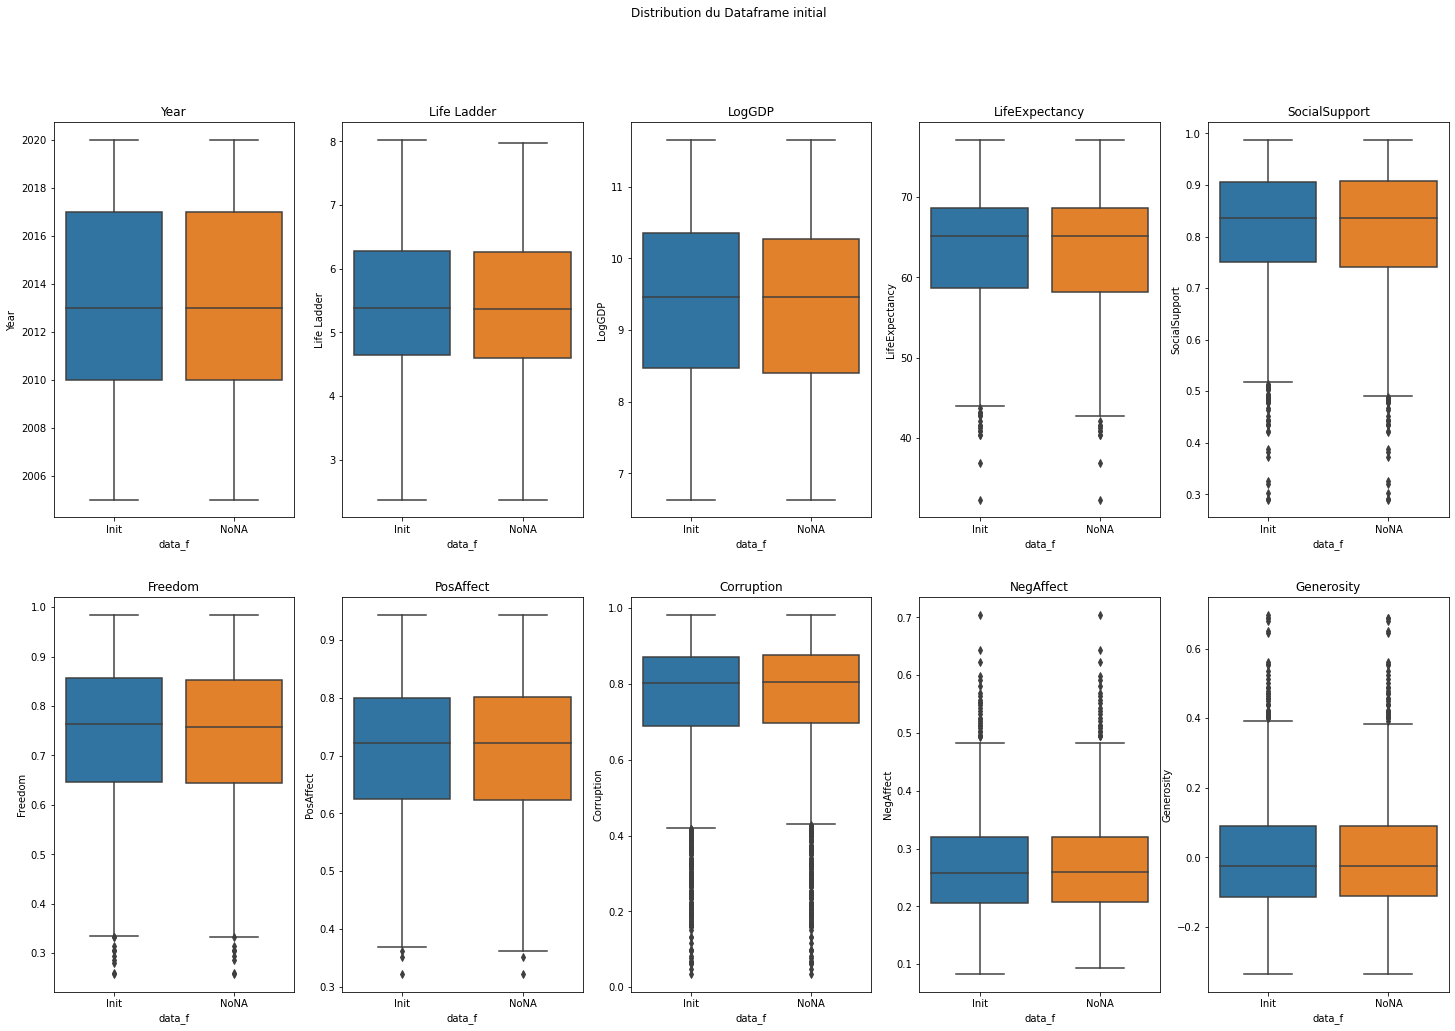

In [125]:
df_compa1 = whr
df_compa1["data_f"] = "Init"
df_compa2 = whr_NoNA
df_compa2["data_f"] = "NoNA" 
df_compa = df_compa1.append(df_compa2)

# valeur aberente
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

fig, axes = plt.subplots(2, 5, figsize=(25, 16), sharey=False)
fig.suptitle('Distribution du Dataframe initial')
sns.boxplot(ax=axes[0, 0],x="data_f", y="Year",data=df_compa)
axes[0, 0].set_title("Year")
sns.boxplot(ax=axes[0, 1],x="data_f", y="Life Ladder",data=df_compa)
axes[0, 1].set_title("Life Ladder")
sns.boxplot(ax=axes[0, 2],x="data_f", y="LogGDP",data=df_compa)
axes[0, 2].set_title("LogGDP")
sns.boxplot(ax=axes[0, 3],x="data_f", y="LifeExpectancy",data=df_compa)
axes[0, 3].set_title("LifeExpectancy")
sns.boxplot(ax=axes[0, 4],x="data_f", y="SocialSupport",data=df_compa)
axes[0, 4].set_title("SocialSupport")
sns.boxplot(ax=axes[1, 0],x="data_f", y="Freedom",data=df_compa)
axes[1, 0].set_title("Freedom")
sns.boxplot(ax=axes[1, 1],x="data_f", y="PosAffect",data=df_compa)
axes[1, 1].set_title("PosAffect")
sns.boxplot(ax=axes[1, 2],x="data_f", y="Corruption",data=df_compa)
axes[1, 2].set_title("Corruption")
sns.boxplot(ax=axes[1, 3],x="data_f", y="NegAffect",data=df_compa)
axes[1, 3].set_title("NegAffect")
sns.boxplot(ax=axes[1, 4],x="data_f", y="Generosity",data=df_compa)
axes[1, 4].set_title("Generosity")

/tmp/ipykernel_5019/621445298.py:9: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(whr.corr(), dtype=np.bool))
/tmp/ipykernel_5019/621445298.py:13: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(whr_NoNA.corr(), dtype=np.bool))


Text(0.5, 1.0, 'whr_NoNA')

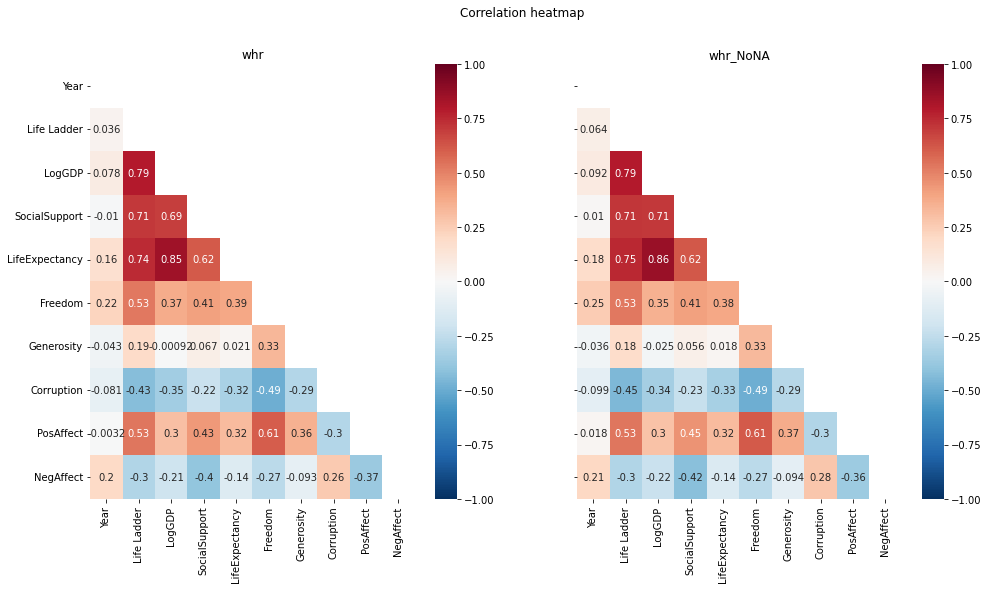

In [16]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

fig, axes = plt.subplots(1, 2, figsize=(16, 8), sharey=True)
fig.suptitle('Correlation heatmap')

mask = np.triu(np.ones_like(whr.corr(), dtype=np.bool))
sns.heatmap(ax=axes[0], data=whr.corr(), annot=True,vmin=-1, vmax=1, cmap='RdBu_r', center=0, mask=mask);
axes[0].set_title("whr")
#
mask = np.triu(np.ones_like(whr_NoNA.corr(), dtype=np.bool))
sns.heatmap(ax=axes[1],data=whr_NoNA.corr(), annot=True,vmin=-1, vmax=1, cmap='RdBu_r', center=0, mask=mask);
axes[1].set_title("whr_NoNA")

<hr>
<h4 style="color:#ae5a41;">Tendance et Tendance / Region</h4>
<hr>

Voici le découpage des 10 régions du monde associées à chaque pays<br>
Amérique du Nord et Australie en vert clair, Amérique latine en orange clair, Europe de l’Ouest en violet clair, Europe centrale et de l’Est en bleu foncé, Moyen-orient et Afrique du Nord en vert foncé, Afrique sub-saharienne en violet, Union de la Russie et Asie central en bleu clair, Asie du Sud en rouge, Asie du Sud-Est en rose, Asie de l’Est en orange.<br>
Nous avons observé le score de bonheur par année et par pays sur une carte avec un code couleur <br>
Les pays Scandinaves, de l’Amérique du nord, l’Australie et la Nouvelle Zélande ont les scores les plus élevés et ils semblent stables. Ensuite, nous avons les pays d'Europe de l’Ouest et les pays d’Amérique latine qui semblent majoritairement bons et stables (avec quelques exceptions). Les pays d’Europe centrale et de l’Est, Moyen-orient et Afrique du Nord, union de la Russie et Asie central, Asie du Sud, Asie de l’Est semblent avoir des scores moyens et qui évoluent un peu au fil des années. Enfin, les deux régions avec des pays dont les scores sont les plus bas viennent de l’Asie du Sud, et de l’Afrique sub-saharienne.<br>
On peut faire des observations similaires avec un graphique de la médiane du score de bonheur en fonction de l’écart-type pour chaque pays.<br>
Nos constats précédents sont confirmés mais on peut également s’intéresser aux pays avec plus ou moins d’évolution (écart-type) et/ou avec un score faible ou élevé. On voit que le score médian de bonheur dépend bien des régions, mais c’est moins évident pour l’écart-type. On peut donc conclure que plus le score est élevé, plus il y a de chances que la variation soit faible au fil du temps. <br>
Exemples : <br>
Le plus stable et le plus haut : Netherlands<br>
Le plus stable et le plus bas : Sri Lanka<br>
Le moins stable et le plus haut : Non existant<br>
Le moins stable et le plus bas : Syrie<br>
<br>
Distribution des variables par région grâce à des boîtes à moustaches :<br>
Il y a de grandes similarités entre la distribution des variables score de bonheur et PIB par région :<br>
Les pays d’Europe ont des PIB très similaires mais leurs scores sont très variés. A l'exact opposé, dans les deux régions d'asie, avec des PIB très variés on observe des scores plus proches.<br>
Les variables sont très dispersées au sein de certaines régions, cependant il convient de noter que ces régions ont des échelles très différentes, en particulier le Moyen-Orient et Afrique du Nord.<br>
Enfin, la région Amérique latine comporte une série de pays avec un score particulièrement faible.<br>
<br>
De manière générale, la distribution annuelle par région est relativement similaire. Toutes les années peuvent donc être étudiées indifféremment, et nous les avons utilisées pour augmenter le volume de données d'entraînement plutôt qu’en temps que variable utile.<br>
L’analyse des distributions des variables confirme l’hétérogénéité entre les régions, il y a une opposition Nord/Sud (hors Amérique latine et Océanie) qui n’est pas surprenante. <br>
En Europe, on remarque une forte hétérogénéité des valeurs dans chaque variable, il serait donc intéressant de différencier ces pays selon d’autres critères, nous pensons au régime politique en particulier. Tandis qu'en Europe de l’ouest, on constate un pessimisme marqué, ceci confirme l’importance d’un paramètre comme la culture comparé à d’autres continents. Au sein de l'Europe on pourrait essayer de comparer les pays du nord et ceux du sud (dits “latins”).<br>
Plus surprenant, la perception de la liberté n’est pas réservée aux pays occidentaux. Et les sentiments positifs sont plus forts dans les pays d’Amérique latine.<br>
Dans l’Asie du Sud, la perception de liberté est plutôt bonne, le sentiment de corruption est moyen et il y a une forte  générosité entre individus. Pourtant le bonheur ne suit pas.<br>
A l’inverse, l'Amérique latine a une corruption forte et il y a peu de générosité. Pourtant les populations semblent plutôt heureuses.<br>
<br>
Certaines corrélations semblent évidentes, mais l’étude des régions met en évidence une limite des variables analysées à ce stade. Des variables semblent manquées afin de mieux comprendre le score de bonheur observé au sein des pays et des régions. Le PIB, notamment, semble regrouper trop d'informations. Nous avons donc ajouté de nouvelles variables pour mieux comprendre ces phénomènes.<br>

<div class="style alert alert-warning">
Les pays suivant ne sont pas dans le fichier gdf : Singapore, Malta, Hong Kong S.A.R. of China, Bahrain, Mauritius, Comoros, Maldives.
</div>


In [32]:
import geopandas as gpd
import json
from bokeh.io import output_notebook, show, output_file
from bokeh.plotting import figure
from bokeh.models import GeoJSONDataSource, LinearColorMapper, ColorBar, ColumnDataSource,LabelSet, Label
from bokeh.palettes import Category20_10
from bokeh.models.widgets import Panel # Panel pour créer des onglets
from bokeh.models.widgets import Tabs  # Tabs pour créer un tableau d'onglet
from bokeh.models.tools import HoverTool
import pandas as pd

output_notebook()

shapefile = 'countries_110m/ne_110m_admin_0_countries.shp'

gdf = gpd.read_file(shapefile)[['ADMIN', 'ADM0_A3', 'geometry']]
gdf.columns = ['Country', 'country_code', 'geometry']

# replace , Singapore : NA, Malta : NA, Hong Kong S.A.R. of China : NA, Bahrain : NA, , Mauritius : NA, Comoros : NA, Maldives : NA
new_names =  {'Tanzania' : 'United Republic of Tanzania', 'United States' : 'United States of America', 'Palestinian Territories':'Palestine',
             'Taiwan Province of China': 'Taiwan','North Macedonia' : 'Macedonia', 'Serbia': 'Republic of Serbia',
             'Congo (Brazzaville)' : 'Republic of the Congo', 'North Cyprus' : 'Northern Cyprus', 'Swaziland' : 'eSwatini',
             'Czech Republic':'Czechia', 'Congo (Kinshasa)':'Democratic Republic of the Congo', 'Somaliland region':'Somaliland'}

df_r= whr_NoNA[["Country","Region"]].drop_duplicates()
df_r["Country"] = df_r["Country"].replace(new_names)
df_r["R_color_code"] = df_r["Region"].replace({'Central and Eastern Europe':0, 'Commonwealth of Independent States':1,
                                               'East Asia':2, 'Latin America and Caribbean':3,
                                               'Middle East and North Africa':4,'North America and ANZ':5, 
                                               'South Asia':6,'Southeast Asia':7, 
                                               'Sub-Saharan Africa':8, 'Western Europe':9})

df_map_r = gdf.merge(df_r, on="Country",how = 'outer')
df_map_r = df_map_r.dropna(subset=['country_code', 'geometry'])
df_map_r_json = json.dumps(json.loads(df_map_r.to_json()))
geosource_r = GeoJSONDataSource(geojson = df_map_r_json)

color_mapper = LinearColorMapper(palette = Category20_10, low = 0, high = 10) #Instantiate LinearColorMapper that linearly maps numbers in a range, into a sequence of colors.
hover = HoverTool(tooltips = [('Country','@Country')])
#Create color bar. 

p_r = figure(title = 'Region', plot_height = 600 , plot_width = 950, toolbar_location = None, tools = [hover])
p_r.xgrid.grid_line_color = None
p_r.ygrid.grid_line_color = None
p_r.patches('xs','ys', source = geosource_r,fill_color = {'field' :'R_color_code', 'transform' : color_mapper},
            line_color = 'black', line_width = 0.25, fill_alpha = 1)

show(p_r)

Loading BokehJS ...

In [18]:
import geopandas as gpd
import json
from bokeh.io import output_notebook, show, output_file
from bokeh.plotting import figure
from bokeh.models import GeoJSONDataSource, LinearColorMapper, ColorBar, ColumnDataSource,LabelSet, Label
from bokeh.palettes import brewer
from bokeh.models.widgets import Panel # Panel pour créer des onglets
from bokeh.models.widgets import Tabs  # Tabs pour créer un tableau d'onglet
from bokeh.models.tools import HoverTool
import pandas as pd

output_notebook()

shapefile = 'countries_110m/ne_110m_admin_0_countries.shp'

gdf = gpd.read_file(shapefile)[['ADMIN', 'ADM0_A3', 'geometry']]
gdf.columns = ['Country', 'country_code', 'geometry']

# replace , Singapore : NA, Malta : NA, Hong Kong S.A.R. of China : NA, Bahrain : NA, , Mauritius : NA, Comoros : NA, Maldives : NA
new_names =  {'Tanzania' : 'United Republic of Tanzania', 'United States' : 'United States of America', 'Palestinian Territories':'Palestine',
             'Taiwan Province of China': 'Taiwan','North Macedonia' : 'Macedonia', 'Serbia': 'Republic of Serbia',
             'Congo (Brazzaville)' : 'Republic of the Congo', 'North Cyprus' : 'Northern Cyprus', 'Swaziland' : 'eSwatini',
             'Czech Republic':'Czechia', 'Congo (Kinshasa)':'Democratic Republic of the Congo', 'Somaliland region':'Somaliland'}

df= whr_NoNA[["Country","Year","Life Ladder"]]
df["Country"] = df["Country"].replace(new_names)

def df_by_Y (dataframe, year):
    df = dataframe
    df_y = df[df['Year'] == year]
    df_map_y = gdf.merge(df_y[["Country","Year","Life Ladder"]], on="Country",how = 'outer')
    df_map_y = df_map_y.dropna(subset=['country_code', 'geometry'])
    #Read data to json
    #Convert to str like object
    df_map_y_json = json.dumps(json.loads(df_map_y.to_json()))
    
    #Input GeoJSON source that contains features for plotting.
    geosource_y = GeoJSONDataSource(geojson = df_map_y_json)
    
    # Instanciation des figures
    p_y = figure(title = 'Life Ladder', plot_height = 600 , plot_width = 950, toolbar_location = None, tools = [hover])
    p_y.xgrid.grid_line_color = None
    p_y.ygrid.grid_line_color = None
    p_y.patches('xs','ys', source = geosource_y,fill_color = {'field' :'Life Ladder', 'transform' : color_mapper},
          line_color = 'black', line_width = 0.25, fill_alpha = 1)
    p_y.add_layout(color_bar, 'below')
    
    return p_y


# PLOT
palette = brewer['RdBu'][10] #Define a sequential multi-hue color palette.
palette = palette[::-1] #Reverse color order so that dark blue is highest obesity.
color_mapper = LinearColorMapper(palette = palette, low = 0, high = 10) #Instantiate LinearColorMapper that linearly maps numbers in a range, into a sequence of colors.
tick_labels = {'0': '0', '1': '1', '2':'2', '3':'3', '4':'4', '5':'5', '6':'6','7':'7', '8': '8', '9': '9', '10': '>10'} #Define custom tick labels for color bar.
hover = HoverTool(tooltips = [('Country','@Country')])
#Create color bar. 
color_bar = ColorBar(color_mapper=color_mapper, label_standoff=8,width = 500, height = 20,
border_line_color=None,location = (0,0), orientation = 'horizontal', major_label_overrides = tick_labels)

# Instanciation des onglets
tab1 = Panel(child = df_by_Y (df, 2005), title = "2005")
tab2 = Panel(child = df_by_Y (df, 2006), title = "2006")  
tab3 = Panel(child = df_by_Y (df, 2007), title = "2007") 
tab4 = Panel(child = df_by_Y (df, 2008), title = "2008") 
tab5 = Panel(child = df_by_Y (df, 2009), title = "2009") 
tab6 = Panel(child = df_by_Y (df, 2010), title = "2010") 
tab7 = Panel(child = df_by_Y (df, 2011), title = "2011") 
tab8 = Panel(child = df_by_Y (df, 2012), title = "2012") 
tab9 = Panel(child = df_by_Y (df, 2013), title = "2013") 
tab10 = Panel(child = df_by_Y (df, 2014), title = "2014") 
tab11 = Panel(child = df_by_Y (df, 2015), title = "2015") 
tab12 = Panel(child = df_by_Y (df, 2016), title = "2016") 
tab13 = Panel(child = df_by_Y (df, 2017), title = "2017") 
tab14 = Panel(child = df_by_Y (df, 2018), title = "2018") 
tab15 = Panel(child = df_by_Y (df, 2019), title = "2019") 
tab16 = Panel(child = df_by_Y (df, 2020), title = "2020") 

# Instanciation du tableau d'onglets
tabs = Tabs(tabs = [tab1, tab2, tab3, tab4, tab5, tab6, tab7, tab8, tab9, tab10, tab11, tab12, tab13, tab14, tab15, tab16])

show(tabs)

Loading BokehJS ...

/tmp/ipykernel_5019/1387364344.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Country"] = df["Country"].replace(new_names)


In [19]:
whr_NoNA

Country  Year  Life Ladder  LogGDP  SocialSupport  LifeExpectancy  \
0     Afghanistan  2008        3.724   7.370          0.451           50.80   
1     Afghanistan  2009        4.402   7.540          0.552           51.20   
2     Afghanistan  2010        4.758   7.647          0.539           51.60   
3     Afghanistan  2011        3.832   7.620          0.521           51.92   
4     Afghanistan  2012        3.783   7.705          0.521           52.24   
...           ...   ...          ...     ...            ...             ...   
1944     Zimbabwe  2016        3.735   7.984          0.768           54.40   
1945     Zimbabwe  2017        3.638   8.016          0.754           55.00   
1946     Zimbabwe  2018        3.616   8.049          0.775           55.60   
1947     Zimbabwe  2019        2.694   7.950          0.759           56.20   
1948     Zimbabwe  2020        3.160   7.829          0.717           56.80   

      Freedom  Generosity  Corruption  PosAffect  NegAffect  \
0       0.718       0.168       0.882      0.518      0.258   
1       0.679       0.190       0.850      0.584      0.237   
2       0.600       0.121       0.707      0.618      0.275   
3       0.496       0.162       0.731      0.611      0.267   
4       0.531       0.236       0.776      0.710      0.268   
...       ...         ...         ...        ...        ...   
1944    0.733      -0.095       0.724      0.738      0.209   
1945    0.753      -0.098       0.751      0.806      0.224   
1946    0.763      -0.068       0.844      0.710      0.212   
1947    0.632      -0.064       0.831      0.716      0.235   
1948    0.643      -0.009       0.789      0.703      0.346   

                  Region data_f  
0             South Asia   NoNA  
1             South Asia   NoNA  
2             South Asia   NoNA  
3             South Asia   NoNA  
4             South Asia   NoNA  
...                  ...    ...  
1944  Sub-Saharan Africa   NoNA  
1945  Sub-Saharan Africa   NoNA  
1946  Sub-Saharan Africa   NoNA  
1947  Sub-Saharan Africa   NoNA  
1948  Sub-Saharan Africa   NoNA  

[1708 rows x 13 columns]

In [39]:
df_whr_Country_name_count = pd.DataFrame(data={'Country': pd.value_counts(whr_NoNA["Country"]).index, 
                                           'nb_values': pd.value_counts(whr_NoNA["Country"]).values}).sort_values(by='nb_values', ascending=False)

df= whr_NoNA[["Country","Year","Life Ladder"]]
df = df.merge(df_whr_Country_name_count,  how='inner').sort_values(by='nb_values', ascending=False)
dfx = df[["Country","Life Ladder"]].groupby('Country').agg(["min","std","median","max"], axis="columns")
df = df.merge(dfx, how="outer", on="Country")

dfx = dfx.merge(whr_NoNA[["Country","Region"]].drop_duplicates(), on='Country', how='inner')

source = ColumnDataSource(data={'std':dfx[('Life Ladder', 'std')].values,
                                'median':dfx[('Life Ladder', 'median')].values,
                                'Country':dfx['Country'].values,
                                'Region_color': dfx['Region'].values})

color_mapper = CategoricalColorMapper(factors=df_missing_data_per_country['Region'].sort_values().unique(), palette=Category20_10)

p = figure(plot_width = 1000, plot_height = 600)

p.circle(x = 'std', y= 'median', size = 10, color = {'field': 'Region_color', 'transform': color_mapper},
             source = source,  legend_field='Region_color', fill_alpha = 0.5)

p.add_tools(HoverTool(tooltips=[("std", "$x"),("median", "$y"), ("Country", "@Country")]))
p.xaxis.axis_label = 'std'
p.yaxis.axis_label = 'median'
#p.add_layout(LabelSet(x='std', y='mean', text='Country',text_font_size='9pt',
 #             x_offset=5, y_offset=5, source=source, render_mode='canvas'))

p.legend.location = "top_right" 
p.x_range = Range1d(0.05, 1)
p.y_range = Range1d(3, 9)


show(p)

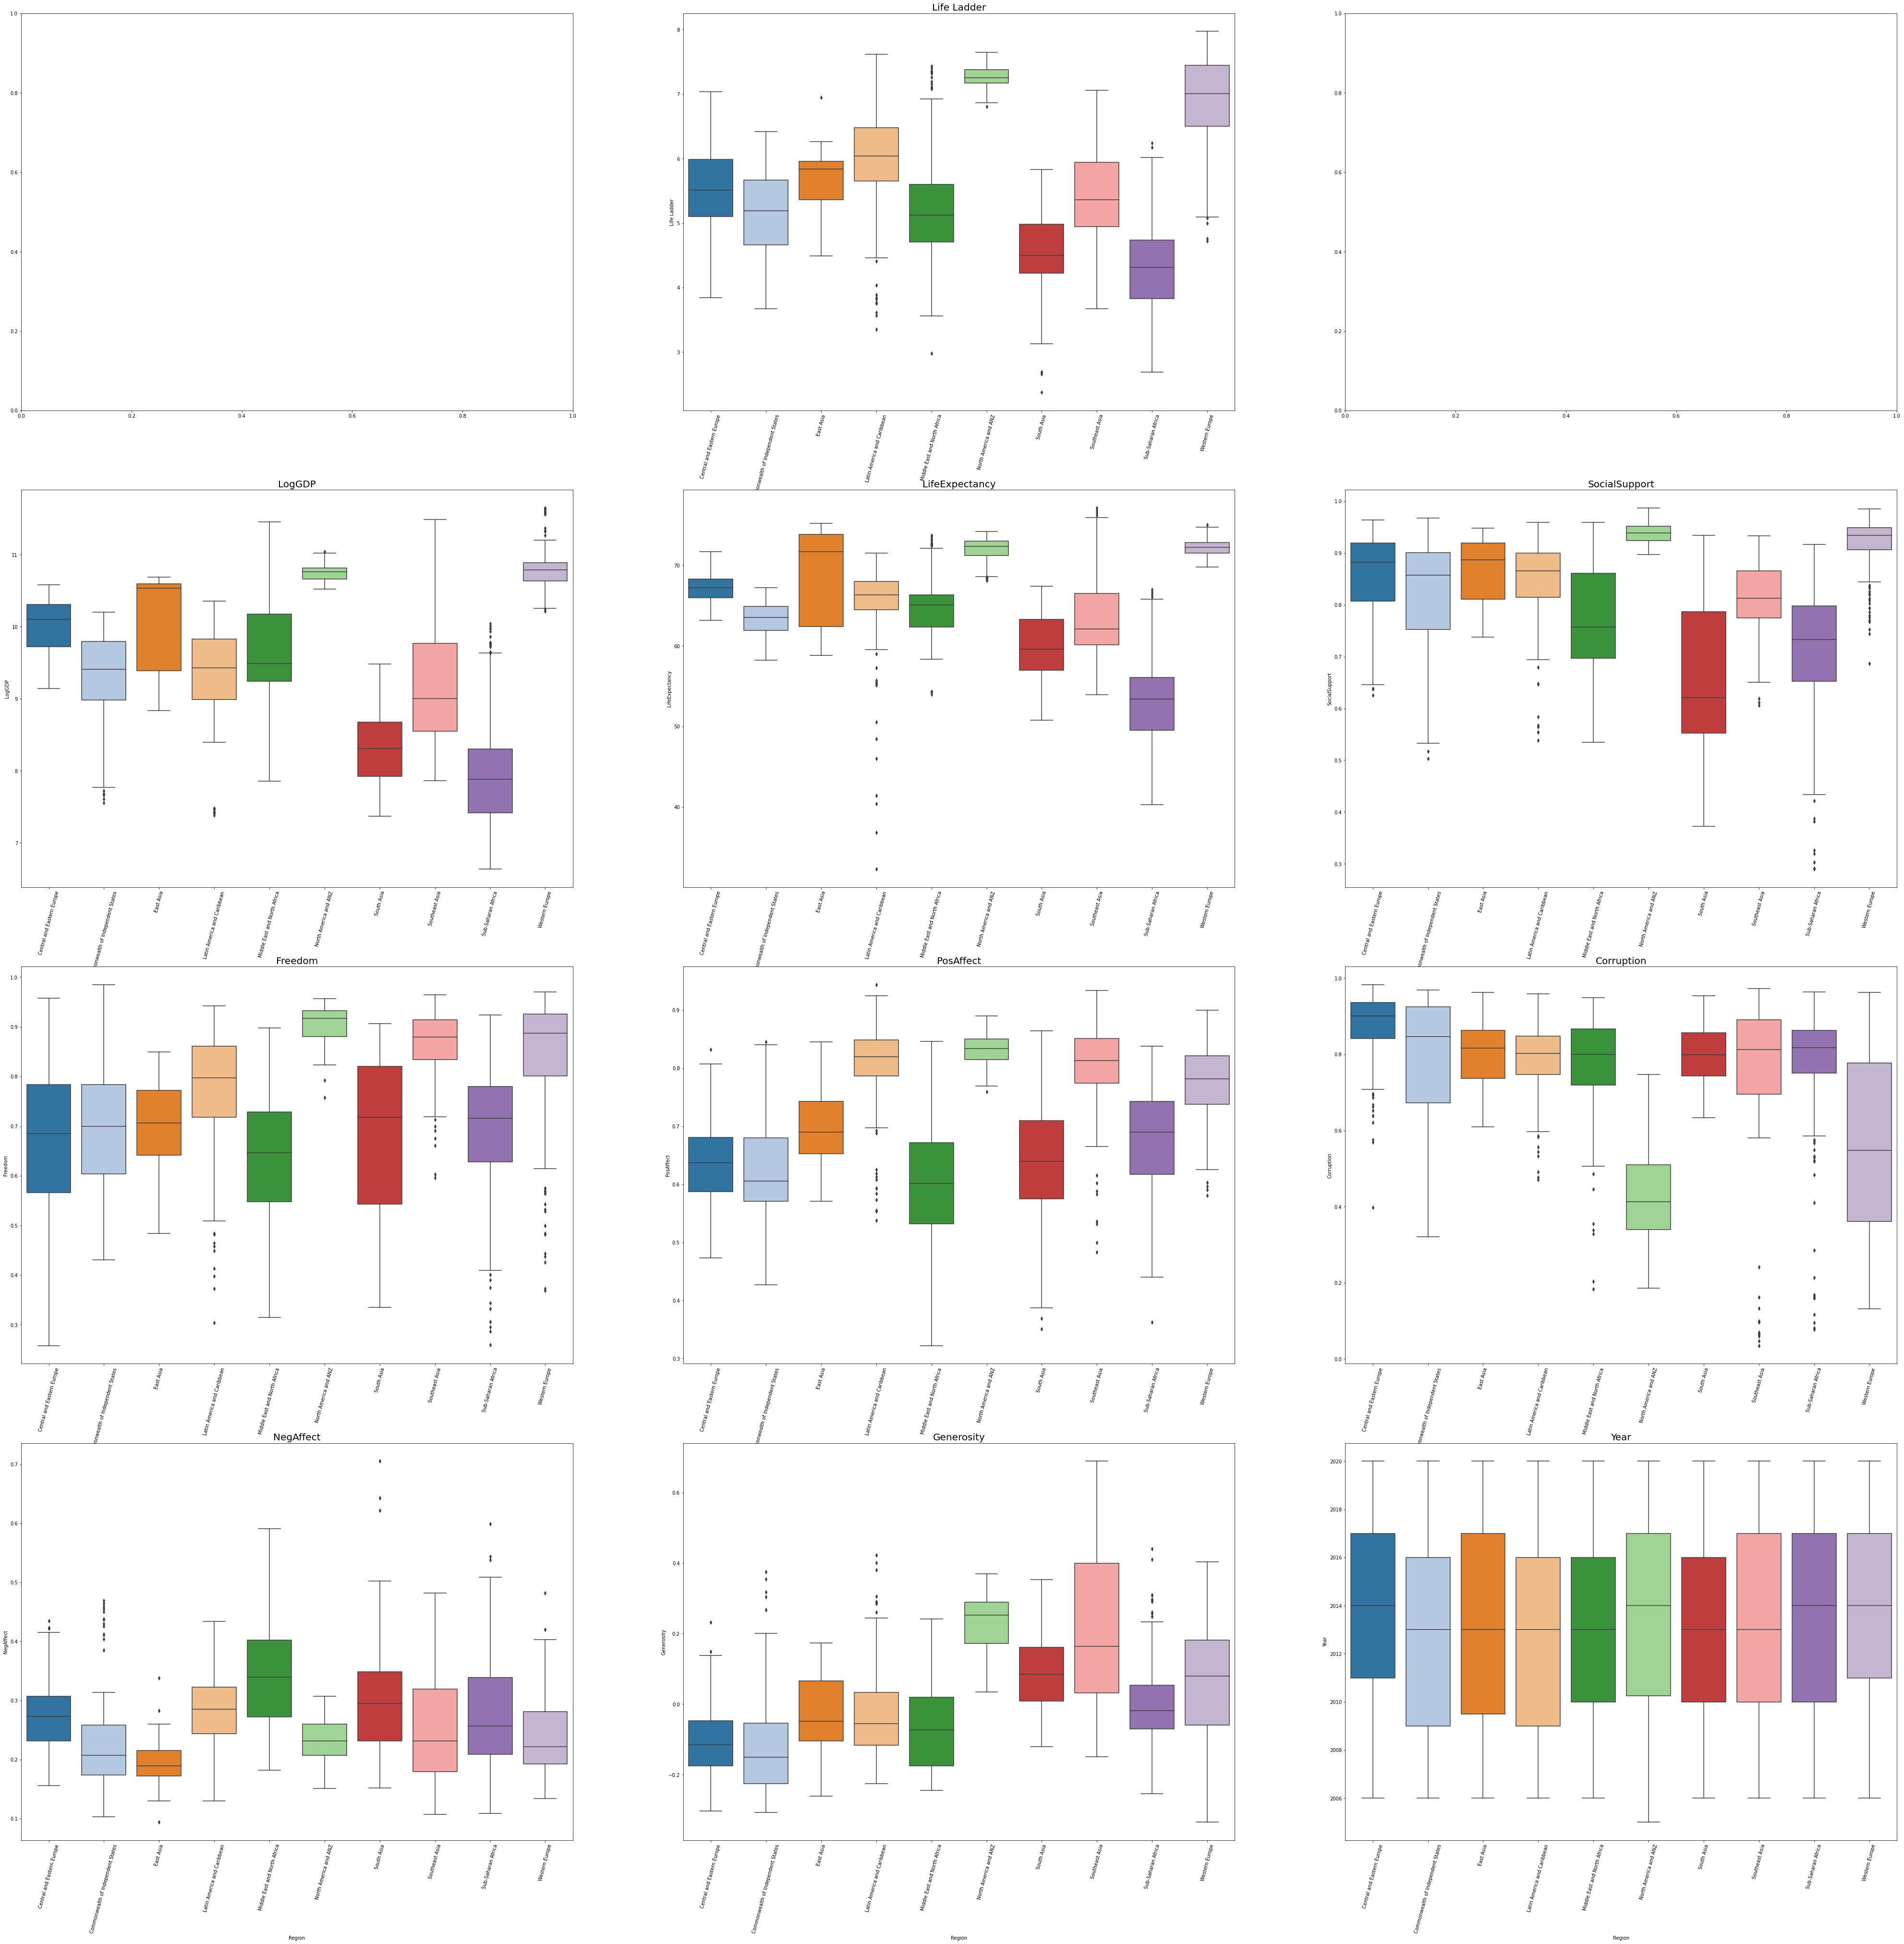

In [133]:
# valeur aberente
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

whr_NoNA =whr_NoNA.sort_values(by="Region")

fig, axes = plt.subplots(4, 3, figsize=(70, 70), sharey=False)
sns.boxplot(ax=axes[0, 1],x="Region", y="Life Ladder",data=whr_NoNA, palette=Category20_10)
axes[0, 1].set_title("Life Ladder", fontsize=20)
axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(),rotation=75)

sns.boxplot(ax=axes[1, 0],x="Region", y="LogGDP",data=whr_NoNA, palette=Category20_10)
axes[1, 0].set_title("LogGDP", fontsize=20)
axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(),rotation=75)

sns.boxplot(ax=axes[1, 1],x="Region", y="LifeExpectancy",data=whr_NoNA, palette=Category20_10)
axes[1, 1].set_title("LifeExpectancy", fontsize=20)
axes[1, 1].set_xticklabels(axes[1, 1].get_xticklabels(),rotation=75)

sns.boxplot(ax=axes[1, 2],x="Region", y="SocialSupport",data=whr_NoNA, palette=Category20_10)
axes[1, 2].set_title("SocialSupport", fontsize=20)
axes[1, 2].set_xticklabels(axes[1, 2].get_xticklabels(),rotation=75)

sns.boxplot(ax=axes[2, 0],x="Region", y="Freedom",data=whr_NoNA, palette=Category20_10)
axes[2, 0].set_title("Freedom", fontsize=20)
axes[2, 0].set_xticklabels(axes[2, 0].get_xticklabels(),rotation=75)

sns.boxplot(ax=axes[2, 1],x="Region", y="PosAffect",data=whr_NoNA, palette=Category20_10)
axes[2, 1].set_title("PosAffect", fontsize=20)
axes[2, 1].set_xticklabels(axes[2, 1].get_xticklabels(),rotation=75)

sns.boxplot(ax=axes[2, 2],x="Region", y="Corruption",data=whr_NoNA, palette=Category20_10)
axes[2, 2].set_title("Corruption", fontsize=20)
axes[2, 2].set_xticklabels(axes[2, 2].get_xticklabels(),rotation=75)

sns.boxplot(ax=axes[3, 0],x="Region", y="NegAffect",data=whr_NoNA, palette=Category20_10)
axes[3, 0].set_title("NegAffect", fontsize=20)
axes[3, 0].set_xticklabels(axes[3, 0].get_xticklabels(),rotation=75)

sns.boxplot(ax=axes[3, 1],x="Region", y="Generosity",data=whr_NoNA, palette=Category20_10)
axes[3, 1].set_title("Generosity", fontsize=20)
axes[3, 1].set_xticklabels(axes[3, 1].get_xticklabels(),rotation=75)

sns.boxplot(ax=axes[3, 2],x="Region", y="Year",data=whr_NoNA, palette=Category20_10)
axes[3, 2].set_title("Year", fontsize=20)
axes[3, 2].set_xticklabels(axes[3, 2].get_xticklabels(),rotation=75)

plt.show()

<hr>
<h4 style="color:#ae5a41;">Set avec valeurs complémentaires</h4>
<hr>
Notre volonté est de décanter l'impact du PIB avec des composantes culturelles. Grâce aux analyses précédentes nous avons retenu une série de variables complémentaires pour expliquer le score de bonheur national : <br>
la population du pays : nombre d’habitant<br>
la superficie du pays : surface en km2<br>
la densité de population : nombre d’habitant / la superficie du pays<br>
le taux de mortalité infantile<br>
l’indice d’inégalités de l’année 2021 (coefficient de Gini)<br>
la corruption mesurée : une donnée plus objective que celle du sondage ressenti<br>
la croissance annuelle de la population<br>
la classe de régime politique (démocratie, démocratie imparfaite, hybride, dictature)<br>
la part de la population croyante pour chaque religion: Christianisme, Islam, Sans-religion, Hindouisme, Bouddhisme, Religions traditionnelles, Autres, Judaisme<br>
Une fois les variables ajoutées nous refaisons une analyse de notre nouveau jeu de données.<br>
Notre nouveau jeu de données a 28 colonnes et 1586 lignes. Ce sont des données numériques à l’exception de la région du monde à laquelle appartient le pays et du régime politique. Et, nous avons 142 pays au total, pour 10 régions et 16 années sans valeur manquante. Ces nouvelles variables nous font donc perdre quelques lignes et quelques pays mais le jeu de données reste très important.<br>
<br>
Nos variables de départ sont toujours distribuées de la même manière :<br>
<br>
Les échelles des nouvelles variables sont plus variées. La population, la superficie et la densité sont des variables avec de très grandes valeurs et souvent des valeurs extrêmes.<br>
Concernant la distribution des religions, on note une forte dispersion pour certaines (ex: christianisme) mais des exceptions pour d’autres tels que l’Hindouisme, le Bouddhisme, les Religions traditionnelles, les Autres religions et le Judaïsme. Ces variables exceptionnelles seront à surveiller car elles peuvent être redondantes (elle expliquerait le pays par le pays ce qui a peu de sens pour nous).<br>
Le reste des variables ont une dispersion sans de vrai valeurs exceptionnelles.<br>
<br>
Désormais, les variables les plus corrélées au score de bonheur sont, de façon positive :<br> 
LogGDP : 0.79, LifeExpectancy : 0.76, SocialSupport : 0.71, la corruption mesurée : 0.7, <br>
Freedom : 0.53, PosAffect : 0.53, et la proportion de “sans religion” : 0.42 et de façon négative : La mortalité infantile : -0.68, Corruption : -0.47, l’islam : -0.36 et la croissance de la population : -0.34.<br>
Les autres variables sont moins corrélées, certaines plus ou moins négligeables.<br>
Des variables ont aussi des corrélations fortes entre elles au delà du score de bonheur : <br>
LogGDP : 0.86 avec LifeExpectancy, 0.75 avec la corruption mesurée, 0.71 avec SocialSupport et -0.85 avec le taux de mortalité infantile.<br>
SocialSupport : 0.61 avec LifeExpectancy et -0.66 avec le taux de mortalité infantile.<br>
LifeExpectancy : 0.66 avec la corruption mesurée et -0.89 avec le taux de mortalité infantile.<br>
Freedom : 0.6 avec PosAffect<br>
La corruption ressentie : -0.65 avec la corruption mesurée.<br>
La population : 0.6 avec l’Hindouisme.<br>
La densité de population : 0.67 avec les religions autres.<br>
La mortalité infantile : -0.61 avec la corruption mesurée.<br>
Le christianisme : -0.75 avec l’islam.<br>
Certaines corrélations inter-variables sont simples à expliquer, d'autres le sont moins.<br>
Avec ces données, nous allons donc tester plusieurs modèles pour tenter d’expliquer le bonheur.<br> 

In [97]:
whr_NoNA_all = pd.read_csv('whr_NoNA_all.csv', sep=';',index_col = 0)

In [98]:
_info(whr_NoNA_all)


Number of duplicated data: 0


Column    Dtype  Number of values  NA values  \
0                     Country   object              1586          0   
1                        Year    int64              1586          0   
2                 Life Ladder  float64              1586          0   
3                      LogGDP  float64              1586          0   
4               SocialSupport  float64              1586          0   
5              LifeExpectancy  float64              1586          0   
6                     Freedom  float64              1586          0   
7                  Generosity  float64              1586          0   
8                  Corruption  float64              1586          0   
9                   PosAffect  float64              1586          0   
10                  NegAffect  float64              1586          0   
11                     Region   object              1586          0   
12                     Regime   object              1586          0   
13                   AreaInK2    int64              1586          0   
14                 Population    int64              1586          0   
15        PopAnnualGrowthRate  float64              1586          0   
16                 PopDensity  float64              1586          0   
17        InfantMortalityRate  float64              1586          0   
18              Christianisme  float64              1586          0   
19                      Islam  float64              1586          0   
20              Sans-religion  float64              1586          0   
21                 Hindouisme  float64              1586          0   
22                 Bouddhisme  float64              1586          0   
23  Religions traditionnelles  float64              1586          0   
24                     Autres  float64              1586          0   
25                   Judaisme  float64              1586          0   
26                GiniCoeff21  float64              1586          0   
27                     Corrup    int64              1586          0   

    Unique values  
0             142  
1              16  
2            1318  
3            1291  
4             435  
5             744  
6             506  
7             576  
8             544  
9             412  
10            348  
11             10  
12              4  
13            142  
14           1586  
15           1283  
16           1106  
17           1279  
18            125  
19             93  
20             85  
21             23  
22             27  
23             41  
24             18  
25             10  
26            111  
27             87

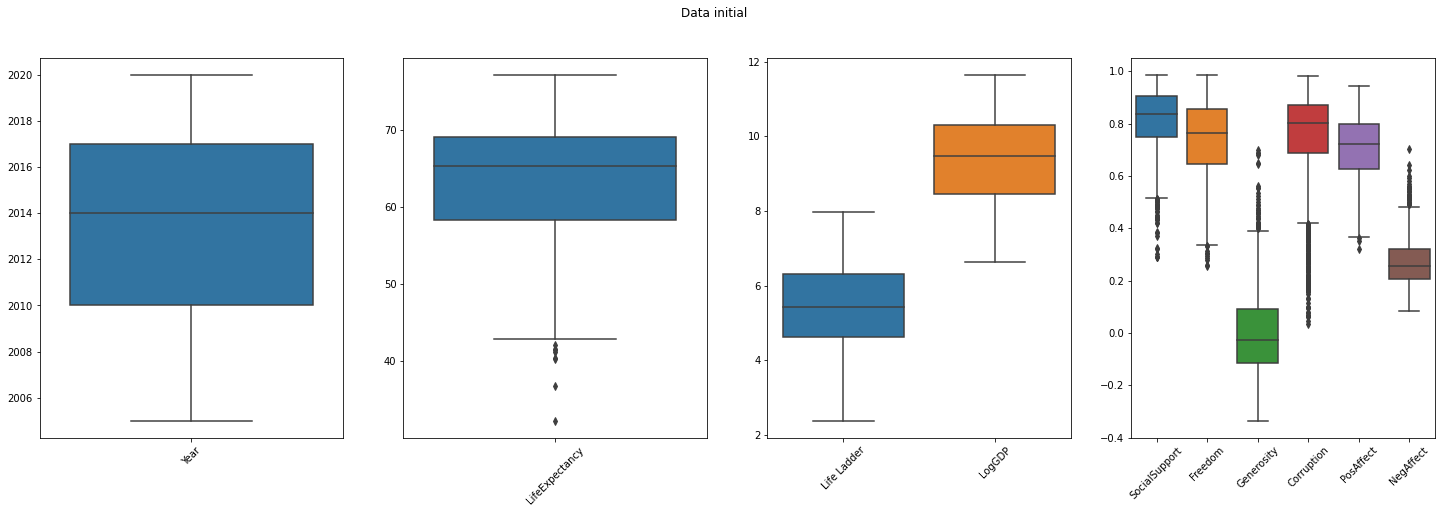

In [130]:
# valeur aberente
# faire les graphes par parties de dajout de data
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

fig, axes = plt.subplots(1, 4, figsize=(25, 7), sharey=False)
fig.suptitle('Data initial')

sns.boxplot(ax=axes[0],data=whr_NoNA_all[["Year"]])
sns.boxplot(ax=axes[1],data=whr_NoNA_all[["LifeExpectancy"]])
sns.boxplot(ax=axes[2],data=whr_NoNA_all[["Life Ladder","LogGDP"]])
sns.boxplot(ax=axes[3],data=whr[["SocialSupport","Freedom","Generosity","Corruption","PosAffect","NegAffect"]])
for i in range(0,4,1):axes[i].set_xticklabels(axes[i].get_xticklabels(),rotation=45)

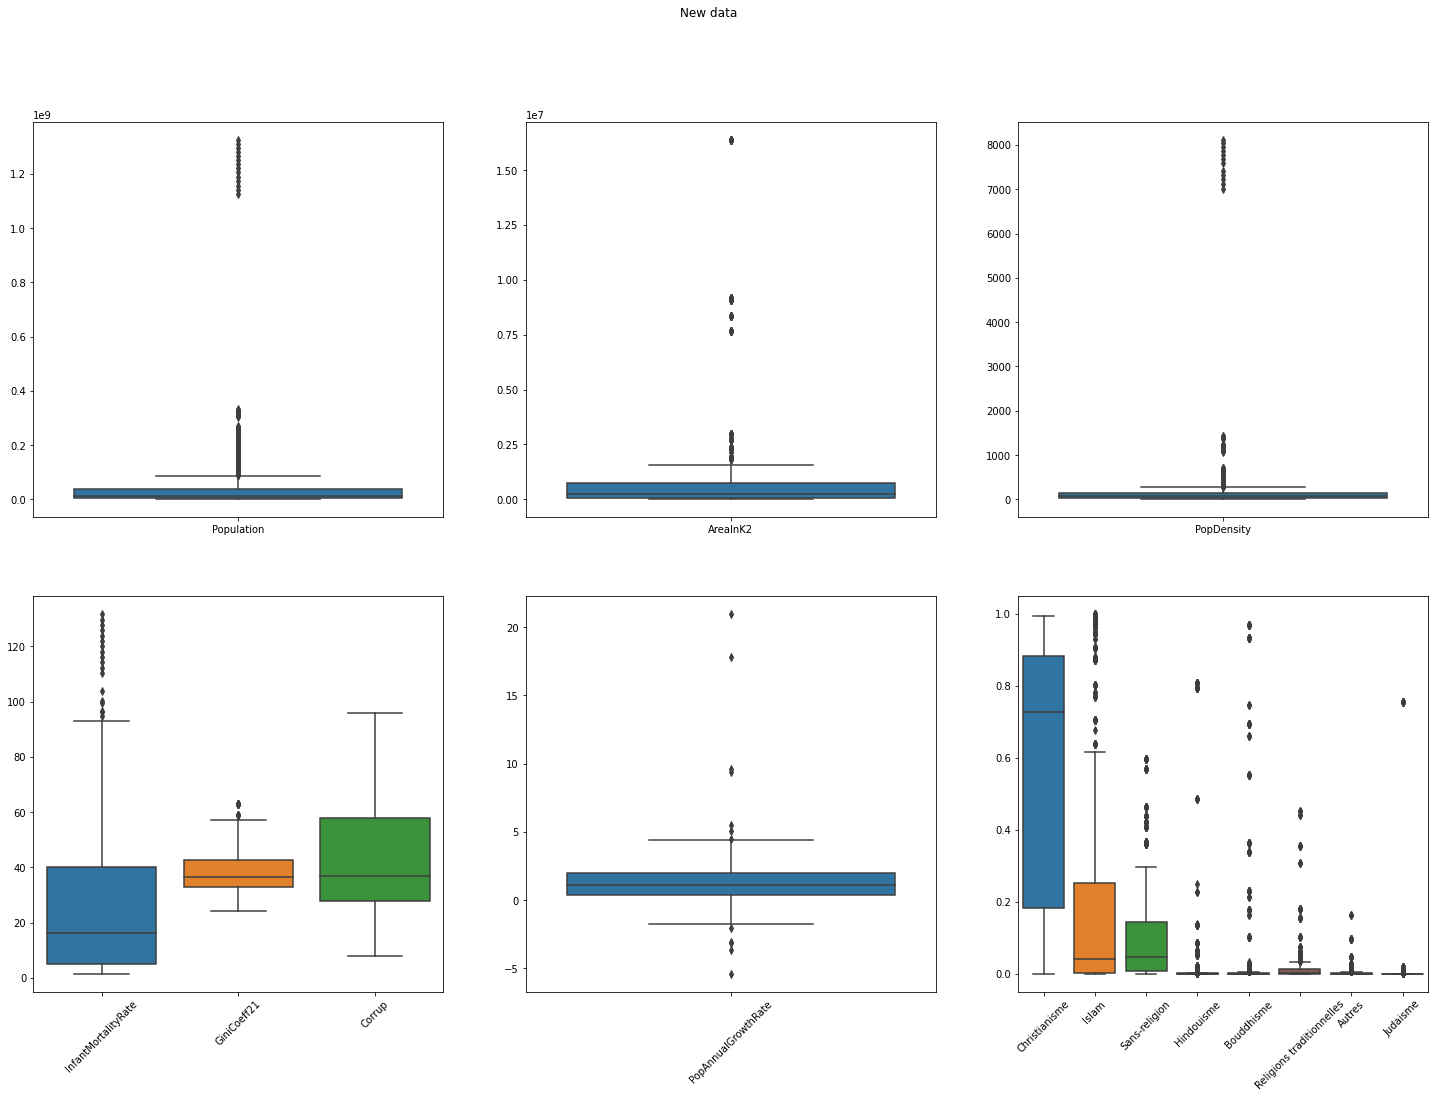

In [131]:
fig, axes = plt.subplots(2, 3, figsize=(25, 16), sharey=False)
fig.suptitle('New data')

sns.boxplot(ax=axes[0, 0],data=whr_NoNA_all[["Population"]])
sns.boxplot(ax=axes[0, 1],data=whr_NoNA_all[["AreaInK2"]])
sns.boxplot(ax=axes[0, 2],data=whr_NoNA_all[["PopDensity"]])
sns.boxplot(ax=axes[1, 0],data=whr_NoNA_all[["InfantMortalityRate","GiniCoeff21","Corrup"]])
sns.boxplot(ax=axes[1, 1],data=whr_NoNA_all[["PopAnnualGrowthRate"]])
sns.boxplot(ax=axes[1, 2],data=whr_NoNA_all[["Christianisme","Islam","Sans-religion","Hindouisme",
                                     "Bouddhisme","Religions traditionnelles","Autres","Judaisme"]])
for i in range(0,3,1):axes[1, i].set_xticklabels(axes[1, i].get_xticklabels(),rotation=45)

/tmp/ipykernel_5019/1747612844.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(whr_NoNA_all.drop(columns=["Country","Region","Regime"]).corr(), dtype=np.bool))


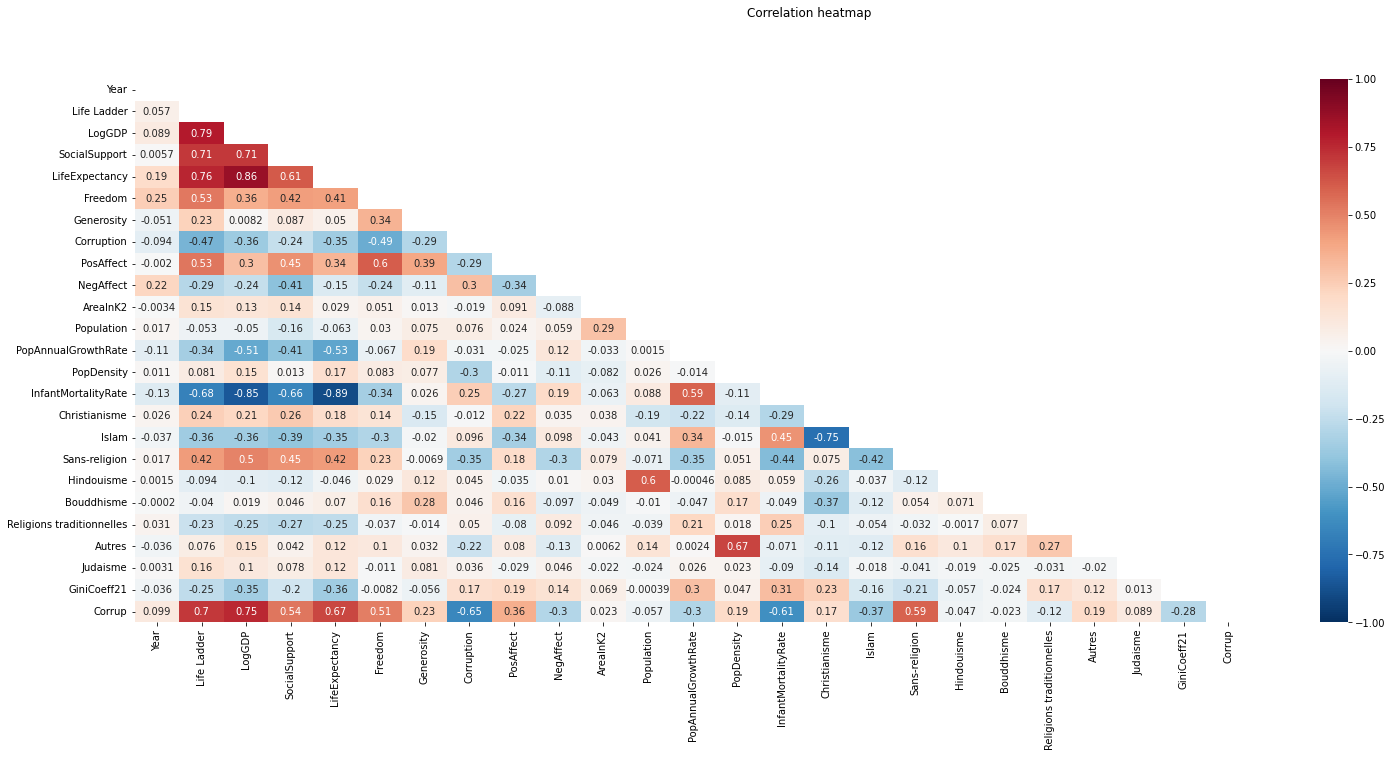

In [100]:
fig, ax = plt.subplots( figsize=(25, 10), sharey=True)
fig.suptitle('Correlation heatmap')

mask = np.triu(np.ones_like(whr_NoNA_all.drop(columns=["Country","Region","Regime"]).corr(), dtype=np.bool))
sns.heatmap(ax=ax, data=whr_NoNA_all.drop(columns=["Country","Region","Regime"]).corr(), 
            annot=True,vmin=-1, vmax=1, cmap='RdBu_r', center=0, mask=mask);